In [56]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
path = "/content/drive/MyDrive/team_project1/data/"

In [3]:
df = pd.read_csv(path + 'binary_classification_data.csv')
print(df.shape)
df.head(3)

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [4]:
X = df.drop('target_class', axis=1)
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [5]:
print(f"원본 데이터의 타겟 비율:\n{df['target_class'].value_counts(normalize=True)}")
print()
print(f"train 데이터의 타겟 비율:\n{y_train.value_counts(normalize=True)}")

원본 데이터의 타겟 비율:
0    0.908426
1    0.091574
Name: target_class, dtype: float64

train 데이터의 타겟 비율:
0    0.908437
1    0.091563
Name: target_class, dtype: float64


### 성능 관련 함수 정의

In [7]:
def cf_maxtix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [8]:
def get_clf_eval(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')
  print(f'F1 Score: {f1:.4f}')

### 기본 로지스틱 회귀 모델 성능

In [9]:
logi = LogisticRegression()

In [10]:
start = time.time()
logi.fit(X_train, y_train)
end = time.time()

print(f"학습하는데 걸린 시간: {end-start}")

학습하는데 걸린 시간: 0.16669106483459473


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
y_pred = logi.predict(X_test)

In [12]:
print(f"test 데이터의 타겟 비율:\n{y_test.value_counts()}")

test 데이터의 타겟 비율:
0    3252
1     328
Name: target_class, dtype: int64


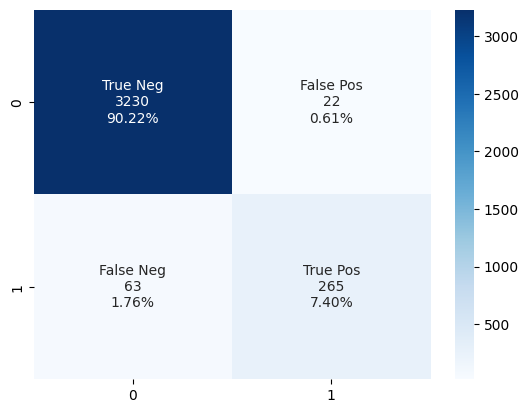

In [13]:
cf_maxtix(y_test, y_pred)

In [14]:
get_clf_eval(y_test, y_pred)

정확도: 0.9763, 정밀도: 0.9233, 재현율: 0.8079
F1 Score: 0.8618


### 정규화를 진행한 기본 로지스틱회귀

#### minmaxscaler

In [16]:
scaler = MinMaxScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
logi = LogisticRegression()

In [18]:
start = time.time()
logi.fit(X_train_scaler, y_train)
end = time.time()

print(f"학습하는데 걸린 시간: {end-start}")

학습하는데 걸린 시간: 0.09754610061645508


In [19]:
y_pred = logi.predict(X_test_scaler)

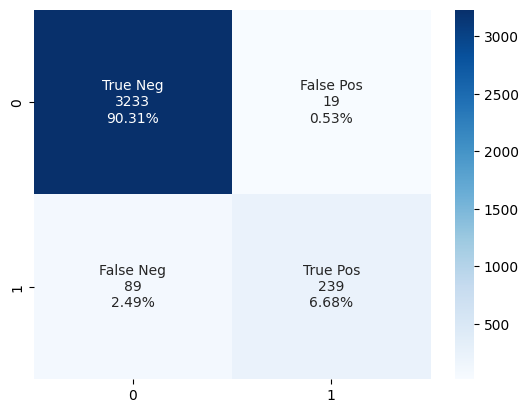

In [20]:
cf_maxtix(y_test, y_pred)

In [21]:
get_clf_eval(y_test, y_pred)

정확도: 0.9698, 정밀도: 0.9264, 재현율: 0.7287
F1 Score: 0.8157


#### StandardScaler

In [22]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [23]:
# 모델 정의
logi = LogisticRegression()

In [24]:
# 학습
start = time.time()
logi.fit(X_train_scaler, y_train)
end = time.time()

print(f"학습하는데 걸린 시간: {end-start}")

학습하는데 걸린 시간: 0.0654606819152832


In [25]:
y_pred = logi.predict(X_test_scaler)

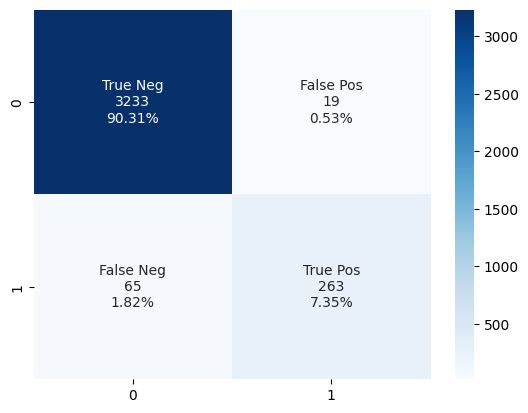

In [26]:
cf_maxtix(y_test, y_pred)

In [27]:
get_clf_eval(y_test, y_pred)

정확도: 0.9765, 정밀도: 0.9326, 재현율: 0.8018
F1 Score: 0.8623
